In [2]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import torch
import clip
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
import os
total_images = 0
base_dir = r"/Users/fatimatuzzahra/Downloads/processed_slices/train"

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith('.png'):
            total_images += 1

print("Total images in testing folder:", total_images)


Total images in testing folder: 84825


In [3]:
# Load data
X_train = np.load("train_fused_features_clean.npy")
y_train = np.load("train_fused_labels_clean.npy")
X_val = np.load("val_fused_features_clean.npy")
y_val = np.load("val_fused_labels_clean.npy")

# y_train = np.where(y_train == 2, 1, 0)
# y_val = np.where(y_val == 2, 1, 0)

In [4]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0: 35150, 1: 51590, 2: 82910}


In [12]:
# Undersampled balanced
from imblearn.under_sampling import RandomUnderSampler
import umap.umap_ as umap

rus = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = rus.fit_resample(X_train, y_train)

# Then re-run UMAP
X_umap_bal = reducer.fit_transform(X_balanced)

In [11]:
# Supervised UMAP
reducer = umap.UMAP(n_components=2, random_state=42, target_metric='categorical')
X_umap_supervised = reducer.fit_transform(X_balanced, y_balanced)

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

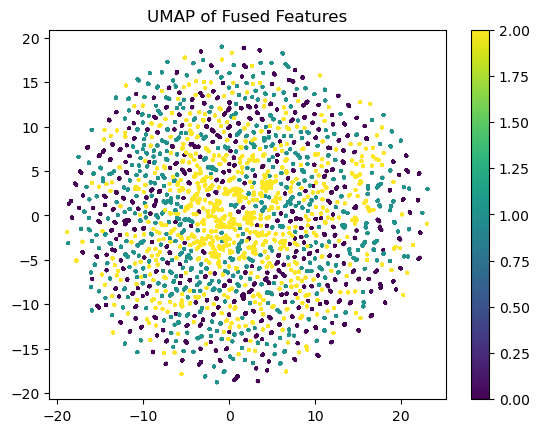

In [13]:
# Visualize 2D UMAP
import matplotlib.pyplot as plt
plt.scatter(X_umap_supervised[:, 0], X_umap_supervised[:, 1], c=y_balanced, cmap="viridis", s=2)
plt.title("UMAP of Fused Features")
plt.colorbar()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


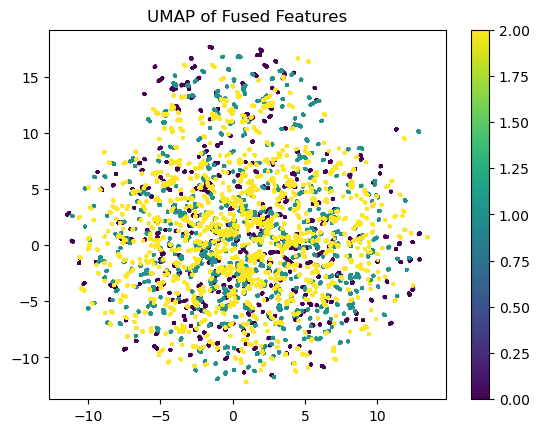

In [7]:
# for visualisation
import umap.umap_ as umap

reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = reducer.fit_transform(X_train)

# Visualize 2D UMAP
import matplotlib.pyplot as plt
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap="viridis", s=2)
plt.title("UMAP of Fused Features")
plt.colorbar()
plt.show()